In [63]:
# Importando bibliotecas necessárias
import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.neighbors import NearestNeighbors
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

### Análise Exploratória dos Dados

In [64]:
# Conjunto de Dados
dataset = pd.read_csv("Data/marketing_campaign.csv", sep="\t")
dataset.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [65]:
dataset.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Pré-processamento dos dados e engenharia de atributos

In [67]:
# Removendo as colunas onde os dados sao todos iguais e o ID
dataset=dataset.drop(columns=["Z_CostContact", "Z_Revenue", 'ID'],axis=1)

In [68]:
# Conferindo os valores únicos das variáveis nominais
print(dataset['Education'].unique())
print(dataset['Marital_Status'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [69]:
# Trocando os valores vazios de renda pela media do dataset
dataset['Income']=dataset['Income'].fillna(dataset['Income'].median())

In [70]:
# Simplificando os valores do estado civil e educacao
dataset['Marital_Status'] = dataset['Marital_Status'].replace(['Married', 'Together'],'Relationship')
dataset['Marital_Status'] = dataset['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')
dataset['Education'] = dataset['Education'].replace(['Basic', '2n Cycle'],'Undergraduate')
dataset['Education'] = dataset['Education'].replace(['Master', 'Postgraduate'],'Postgraduate')

In [71]:
# Convertendo os dados de tempo para formato de data e utilizando apenas o ano
dataset["Dt_Customer"] = pd.to_datetime(dataset["Dt_Customer"], infer_datetime_format=True, dayfirst=True)
dates = []
for i in dataset["Dt_Customer"]:
    i = i.date().year
    dates.append(i)  
    
dataset["Dt_Customer"] = dates
dataset["Dt_Customer"].head()

0    2012
1    2014
2    2013
3    2014
4    2014
Name: Dt_Customer, dtype: int64

In [72]:
# Convertendo o atributo ano de nascimento pela idade do cliente
dataset["Age"] = 2022-dataset["Year_Birth"]
dataset = dataset.drop(columns='Year_Birth', axis=1)

# Unificando os gastos em produtos para apenas uma coluna coluna geral de gastos totais
dataset["Spent"] = dataset["MntWines"] + \
                   dataset["MntFruits"] + \
                   dataset["MntMeatProducts"] + \
                   dataset["MntFishProducts"] + \
                   dataset["MntSweetProducts"] + \
                   dataset["MntGoldProds"]
                   
# Unificando as compras em apenas uma coluna de compras totais
dataset["Purchases"] = dataset["NumDealsPurchases"] + \
                       dataset["NumWebPurchases"] + \
                       dataset["NumCatalogPurchases"] + \
                       dataset["NumStorePurchases"] 

# Quantificando a quantidade de filhos num mesmo cliente
dataset["Children"]= dataset["Kidhome"] + dataset["Teenhome"]
dataset = dataset.drop(columns=['Kidhome', 'Teenhome'], axis=1)

### Análise Exploratória do novo Dataset

<Figure size 1440x1440 with 0 Axes>

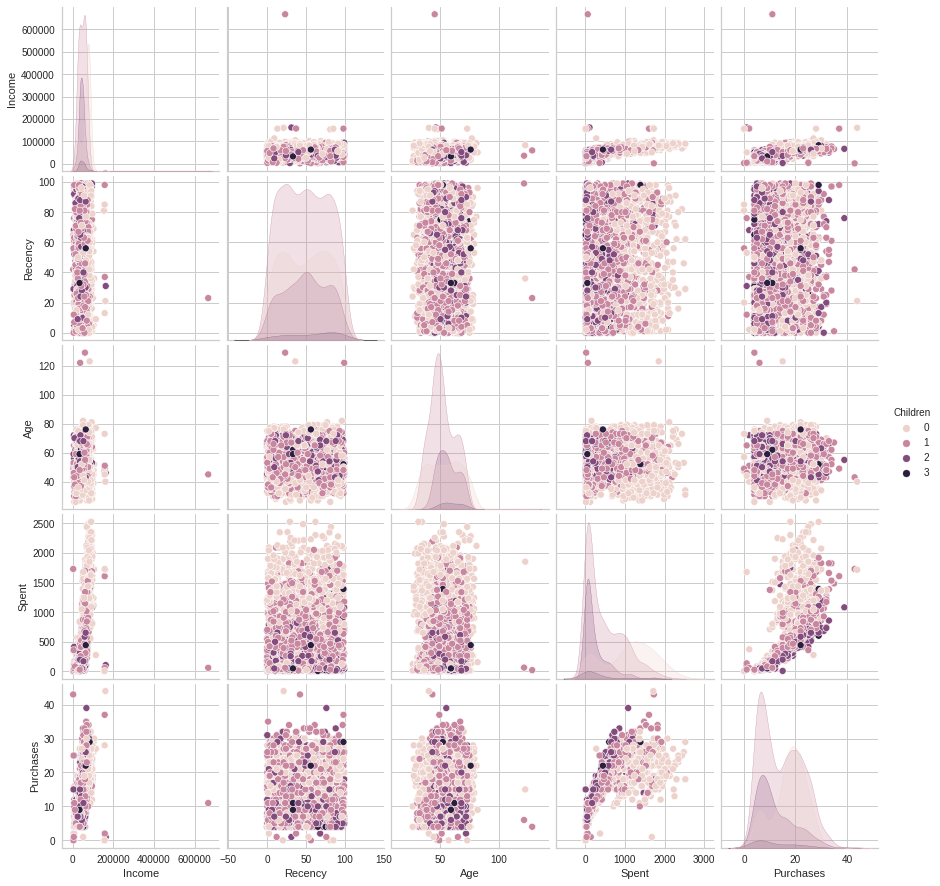

In [73]:
# Plotando os principais atributos do dataset em pares e relacionados a quantidade de filhos de cada cliente
plot = [ "Income", "Recency", "Age", "Spent", "Children", "Purchases"]
plt.figure(figsize=[20, 20])
plot = sns.pairplot(dataset[plot], hue= "Children")
_ = plt.show()

<Figure size 1440x1440 with 0 Axes>

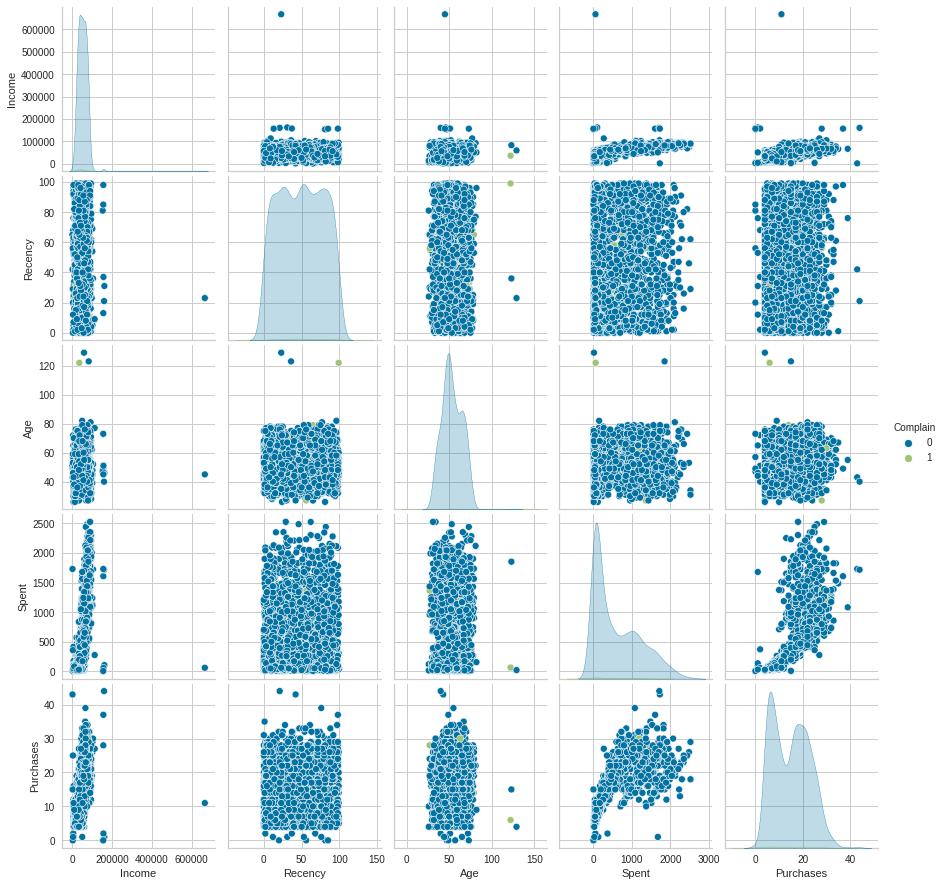

In [74]:
# Plotando os principais atributos do dataset em pares e relacionados se o cliente ja reclamou alguma vez
plot = [ "Income", "Recency", "Age", "Spent", "Purchases", "Complain"]
plt.figure(figsize=[20, 20])
plot = sns.pairplot(dataset[plot], hue= "Complain")
#Taking hue 
_ = plt.show()

<Figure size 1440x1440 with 0 Axes>

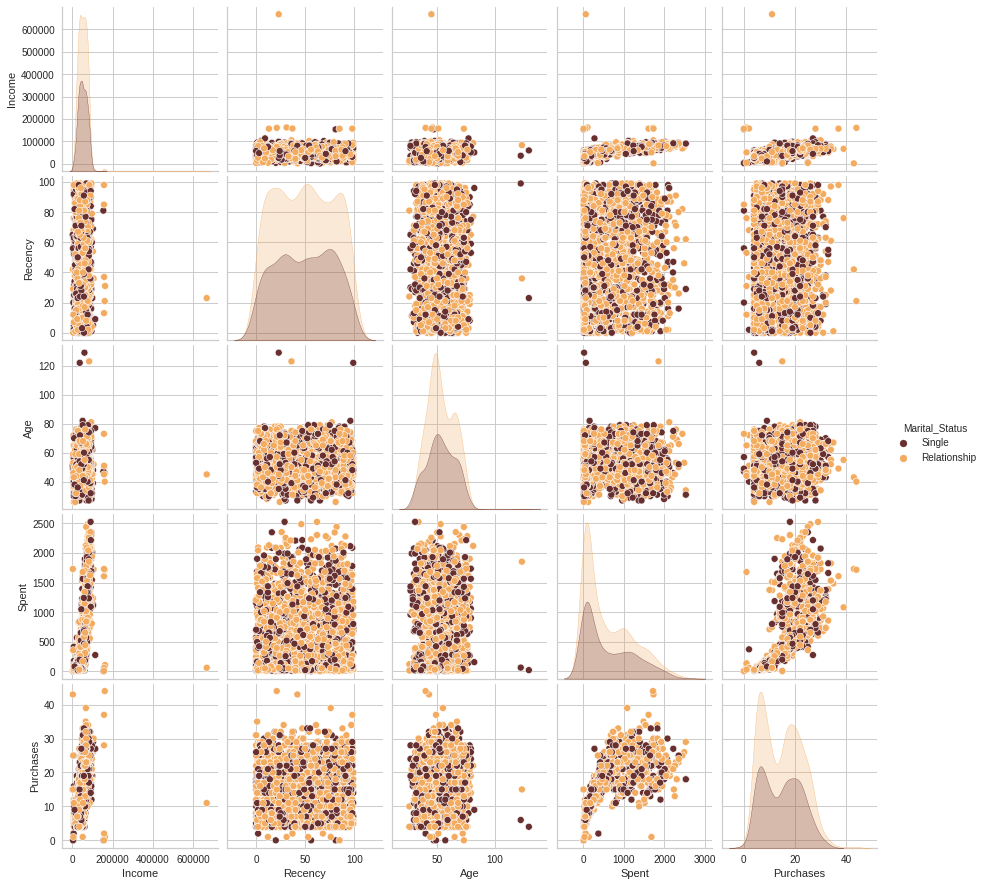

In [75]:
 # Plotando os principais atributos do dataset em pares e relacionados ao estado civil do cliente
To_Plot = [ "Income", "Recency", "Age", "Spent", "Purchases", "Marital_Status"]
plt.figure(figsize=[20, 20])
plot = sns.pairplot(dataset[To_Plot], hue= "Marital_Status",palette=(["#682F2F","#F3AB60"]))
#Taking hue 
_ = plt.show()

In [76]:
# Removendo possiveis outliers
dataset = dataset[(dataset["Age"]<90)]
dataset = dataset[(dataset["Income"]<600000)]

### Pré-Processamento do Dataset para execucao dos algoritmos de agrupamento

In [77]:
# Convertendo os atributos categóricos em numericos
categorical = (dataset.dtypes == 'object')
object_cols = list(categorical[categorical].index)

LE=LabelEncoder()
for i in object_cols:
    dataset[i]=dataset[[i]].apply(LE.fit_transform)

dataset.head()

Education  Marital_Status   Income  Dt_Customer  Recency  MntWines  \
0          0               1  58138.0         2012       58       635   
1          0               1  46344.0         2014       38        11   
2          0               0  71613.0         2013       26       426   
3          0               0  26646.0         2014       26        11   
4          1               0  58293.0         2014       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0         88              546              172                88  ...   
1          1                6                2                 1  ...   
2         49              127              111                21  ...   
3          4               20               10                 3  ...   
4         43              118               46                27  ...   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

   Age  Spent  Purchases  Children  
0   65   1617         25         0  
1   68     27          6         2  
2   57    776         21         0  
3   38     53          8         1  
4   41    422         19         1  

[5 rows x 27 columns]

In [78]:
# Normalizando os dados
scaler = StandardScaler()
scaler.fit(dataset)
scaled_dataset = pd.DataFrame(scaler.transform(dataset),columns= dataset.columns )

scaled_dataset.head()

Education  Marital_Status    Income  Dt_Customer   Recency  MntWines  \
0  -0.843549        1.347635  0.288947    -1.500981  0.306856  0.983228   
1  -0.843549        1.347635 -0.262003     1.419988 -0.383971 -0.871064   
2  -0.843549       -0.742041  0.918423    -0.040496 -0.798467  0.362159   
3  -0.843549       -0.742041 -1.182183     1.419988 -0.798467 -0.871064   
4   0.104278       -0.742041  0.296187     1.419988  1.550344 -0.389661   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0   1.554170         1.679746         2.461068          1.475396  ...   
1  -0.636431        -0.713455        -0.650414         -0.631638  ...   
2   0.572177        -0.177201         1.344595         -0.147262  ...   
3  -0.560893        -0.651409        -0.503991         -0.583200  ...   
4   0.421101        -0.217088         0.154911         -0.001950  ...   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0     -0.284104     -0.279482     -0.262362     -0.116616 -0.095001  2.386338   
1     -0.284104     -0.279482     -0.262362     -0.116616 -0.095001 -0.419052   
2     -0.284104     -0.279482     -0.262362     -0.116616 -0.095001 -0.419052   
3     -0.284104     -0.279482     -0.262362     -0.116616 -0.095001 -0.419052   
4     -0.284104     -0.279482     -0.262362     -0.116616 -0.095001 -0.419052   

        Age     Spent  Purchases  Children  
0  1.016868  1.680176   1.319340 -1.264308  
1  1.273264 -0.962202  -1.155857  1.395139  
2  0.333146  0.282541   0.798246 -1.264308  
3 -1.290693 -0.918994  -0.895310  0.065416  
4 -1.034298 -0.305762   0.537699  0.065416  

[5 rows x 27 columns]

In [79]:
# Reduzindo a demensionalidade do dataset para 3
pca = PCA(n_components=3)
pca.fit(scaled_dataset)
pca_dataset = pd.DataFrame(pca.transform(scaled_dataset), columns=(["x","y", "z"]))
pca_dataset.describe().T

count          mean       std       min       25%       50%       75%  \
x  2236.0 -1.048654e-16  2.854817 -4.985670 -2.645768 -0.723262  2.345342   
y  2236.0  2.542192e-17  1.476587 -3.935127 -1.057928 -0.280461  0.909777   
z  2236.0  2.383305e-17  1.377922 -3.104839 -0.673934 -0.126920  0.260726   

        max  
x  8.608530  
y  6.048416  
z  8.930233

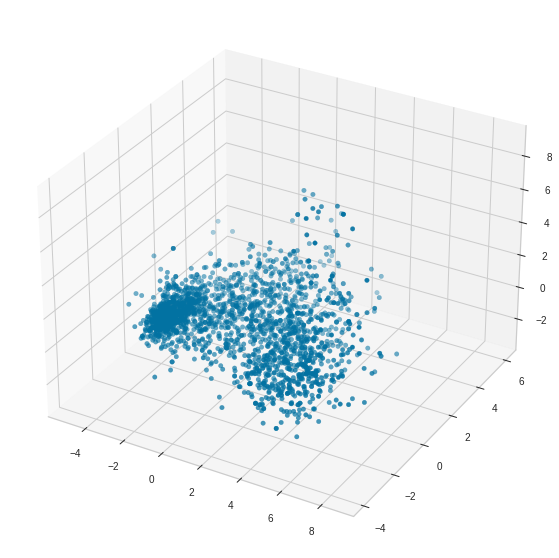

In [80]:
# Plotando os dados reduzidos
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(pca_dataset["x"],pca_dataset["y"],pca_dataset["z"], marker="o" )
plt.show()

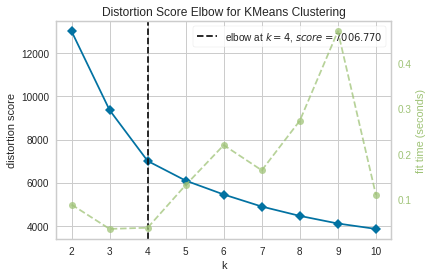

In [81]:
# Buscando o numero ideal de cluster atraves da analise do cotovelo com utilizacao do KMeans
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_dataset)
_ = Elbow_M.show()

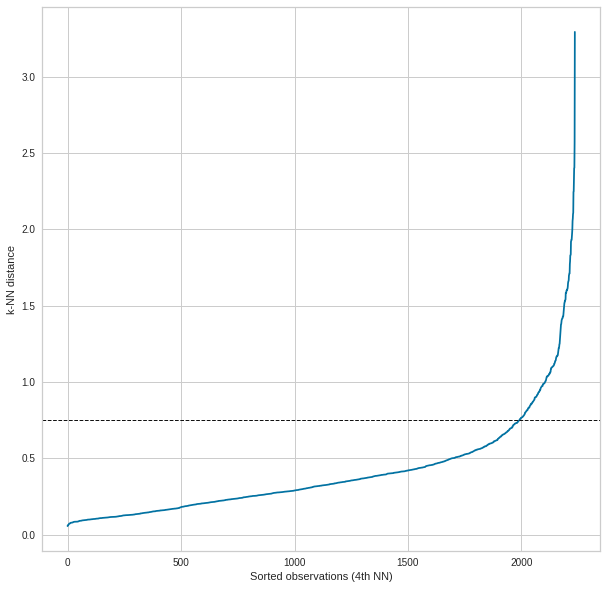

In [82]:
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors=5).fit(pca_dataset)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(pca_dataset)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)

k_dist = sort_neigh_dist[:, 4]
fig = plt.figure(figsize=(10,10))
plt.plot(k_dist)
plt.axhline(y=0.75, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [83]:
clusters = DBSCAN(eps=0.75, min_samples=50).fit(pca_dataset)
dataset['Clusters'] = clusters.labels_
# check unique clusters
set(clusters.labels_)

{-1, 0}

In [84]:
Counter(clusters.labels_)

Counter({-1: 1164, 0: 1072})

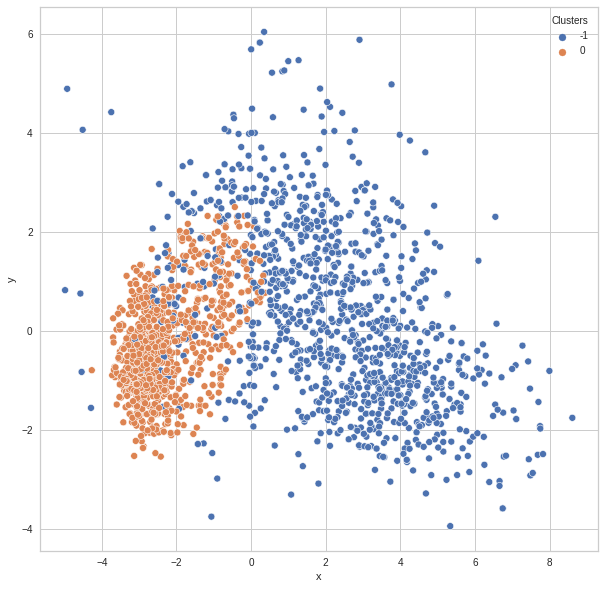

In [86]:
# Análise da distribuicao dos clusters em relação ao conjunto subdimensionalizado com PCA para o eixo xy
fig = plt.figure(figsize=(10,10))
p = sns.scatterplot(data=pca_dataset, x="x", y="y", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1, 1), title='Clusters')
plt.show()

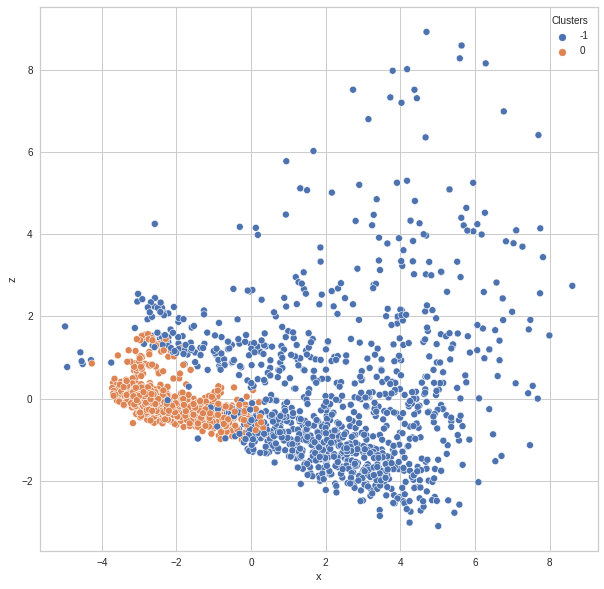

In [88]:
# Análise da distribuicao dos clusters em relação ao conjunto subdimensionalizado com PCA para o eixo xz
fig = plt.figure(figsize=(10,10))
p = sns.scatterplot(data=pca_dataset, x="x", y="z", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1, 1), title='Clusters')
plt.show()

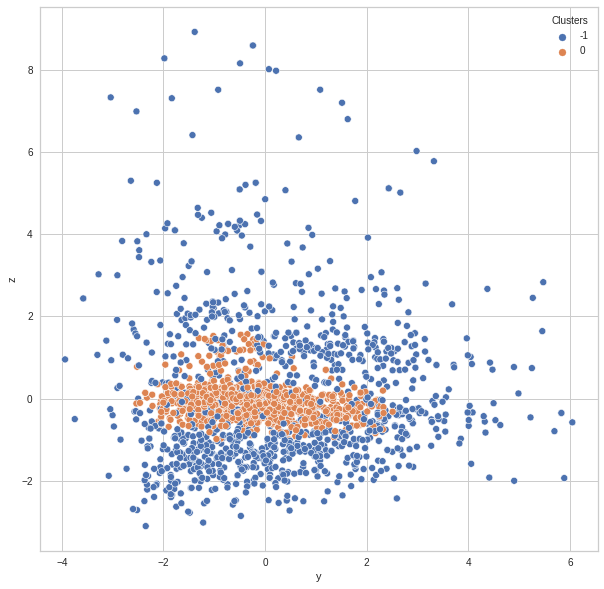

In [89]:
# Análise da distribuicao dos clusters em relação ao conjunto subdimensionalizado com PCA para o eixo yz
fig = plt.figure(figsize=(10,10))
p = sns.scatterplot(data=pca_dataset, x="y", y="z", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1, 1), title='Clusters')
plt.show()

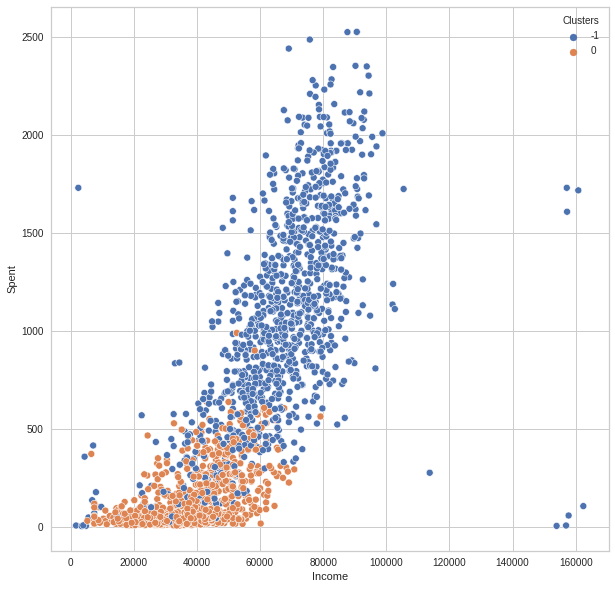

In [90]:
# Análise dos clusters relação ao salario(income)Xgasto(spent)
fig = plt.figure(figsize=(10,10))
p = sns.scatterplot(data=dataset,x = 'Income', y='Spent', hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1, 1), title='Clusters')
plt.show()

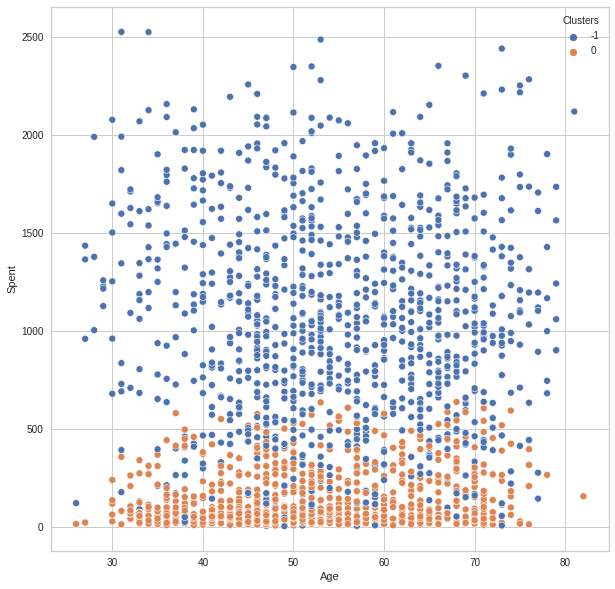

In [91]:
# Análise dos clusters relação ao gasto(spent)Xidade(age)
fig = plt.figure(figsize=(10,10))
p = sns.scatterplot(data=dataset,x = 'Age', y='Spent', hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1, 1), title='Clusters')
plt.show()

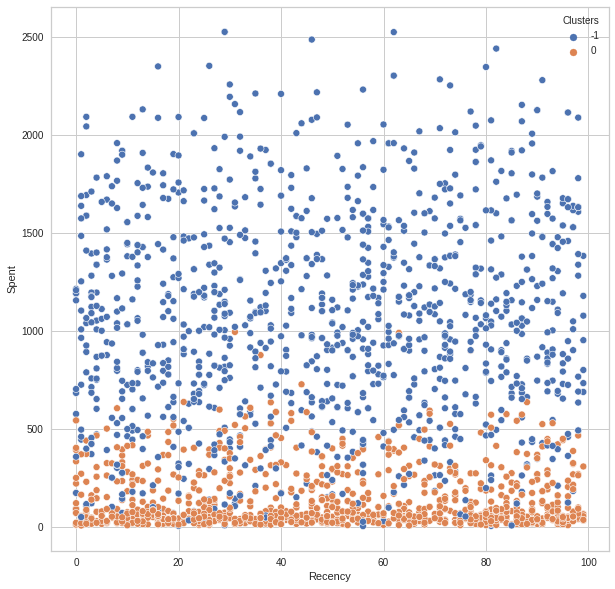

In [ ]:
# Análise dos clusters relação ao gasto(spent)Xdias_sem_compras(recency)
fig = plt.figure(figsize=(10,10))
p = sns.scatterplot(data=dataset,x = 'Recency', y='Spent', hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1, 1), title='Clusters')
plt.show()

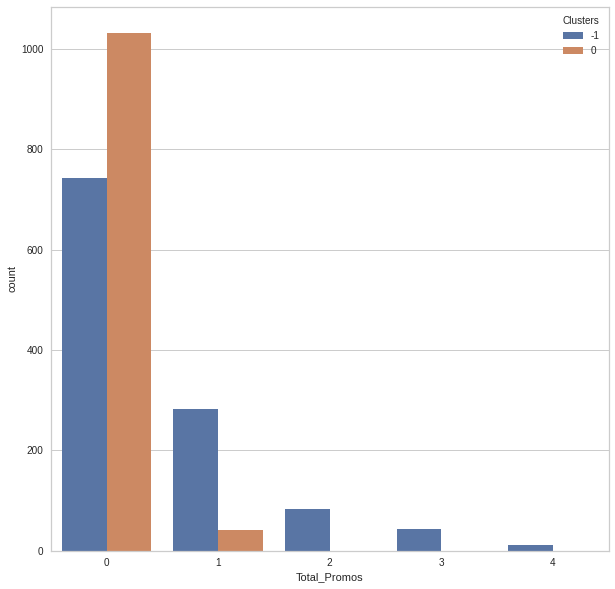

In [96]:
# Somando as promoções aceitas em apenas uma coluna
dataset["Total_Promos"] = dataset["AcceptedCmp1"] + \
                          dataset["AcceptedCmp2"] + \
                          dataset["AcceptedCmp3"] + \
                          dataset["AcceptedCmp4"] + \
                          dataset["AcceptedCmp5"]

# Análise dos clusters relação a quantidade de promoções aceitas por cada cluster
fig = plt.figure(figsize=(10,10))
p = sns.countplot(x=dataset['Total_Promos'], hue=clusters.labels_, palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1, 1), title='Clusters')
plt.show()

### Extração de Características dos Clusters

<Figure size 720x720 with 0 Axes>

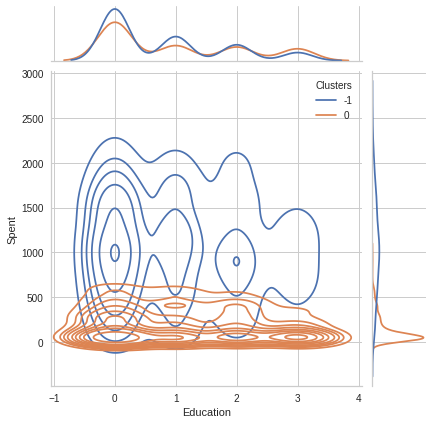

<Figure size 720x720 with 0 Axes>

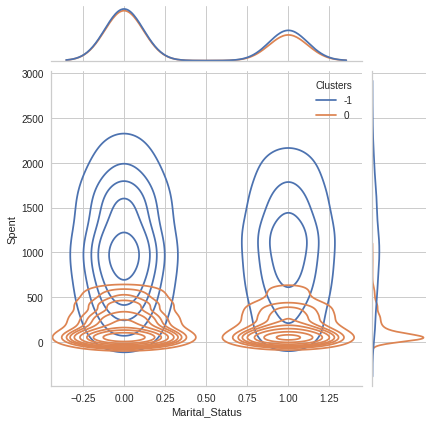

<Figure size 720x720 with 0 Axes>

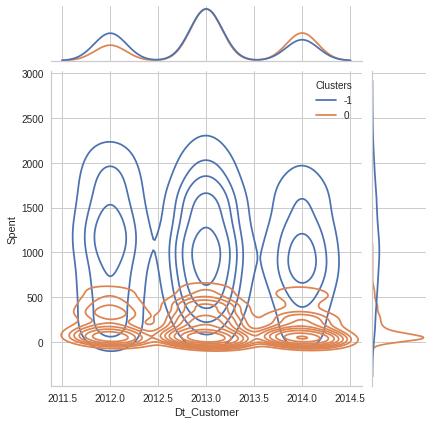

<Figure size 720x720 with 0 Axes>

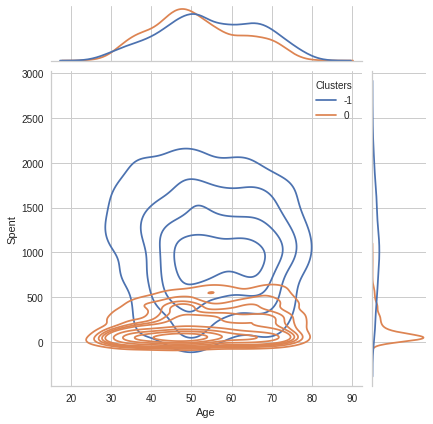

<Figure size 720x720 with 0 Axes>

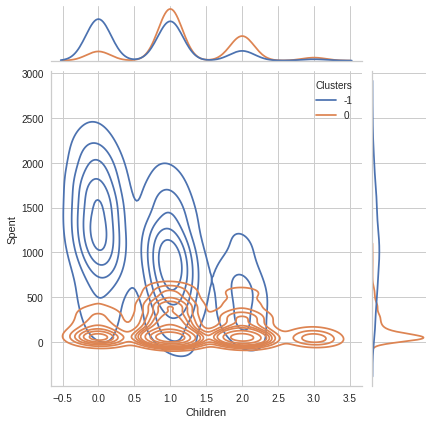

<Figure size 720x720 with 0 Axes>

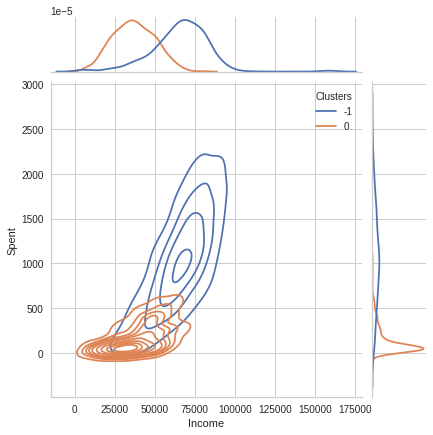

In [100]:
Features = [ "Education", "Marital_Status", "Dt_Customer", "Age", "Children", "Income"]

for i in Features:
    plt.figure(figsize=[10, 10])
    sns.jointplot(x=dataset[i], y=dataset["Spent"], hue=dataset["Clusters"], kind="kde", palette='deep')
    plt.show()

In [ ]:
dataset['Clusters'] = clusters.labels_

<Figure size 1440x1440 with 0 Axes>

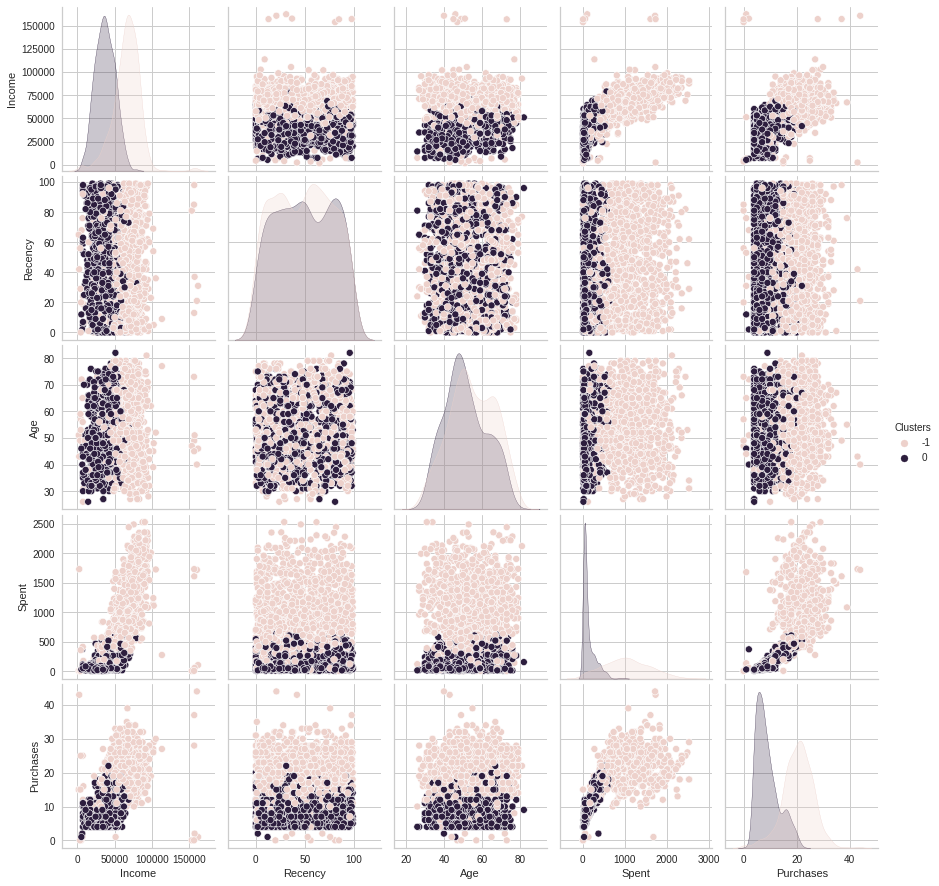

In [99]:
# Plotando os principais atributos do dataset em pares e relacionados aos clusters
plot = [ "Income", "Recency", "Age", "Spent", "Purchases", "Clusters"]
plt.figure(figsize=[20, 20])
plot = sns.pairplot(dataset[plot], hue= "Clusters")
#Taking hue 
_ = plt.show()

# Kmeans

In [103]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=9863)
kmeans_pca = kmeans.fit(pca_dataset)
dataset['ClustersKMeans'] = kmeans_pca.labels_

In [104]:
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=9863).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

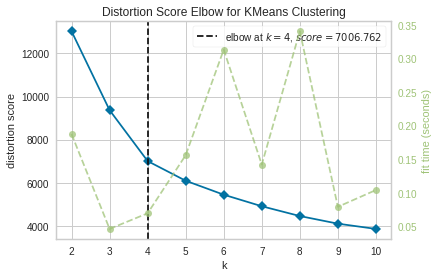

In [105]:
# Buscando o numero ideal de cluster atraves da analise do cotovelo com utilizacao do KMeans
Elbow_M = KElbowVisualizer(KMeans(init='k-means++', n_init=10, random_state=9863), k=10)
Elbow_M.fit(pca_dataset)
_ = Elbow_M.show()

In [106]:
sil = []
kmax = 10
x = []

for k in range(2, kmax+1):
  kmeansTest = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=9863).fit(pca_dataset)
  labels = kmeansTest.labels_
  sil.append(silhouette_score(pca_dataset, labels, metric = 'euclidean'))
  x.append(k)

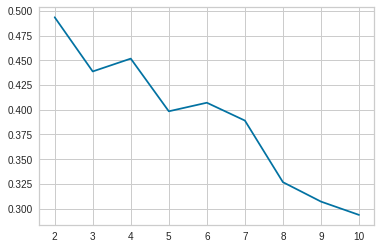

In [107]:
plt.plot(x, sil)
plt.show()

In [108]:
Counter(kmeans_pca.labels_)

Counter({0: 515, 1: 1025, 2: 546, 3: 150})

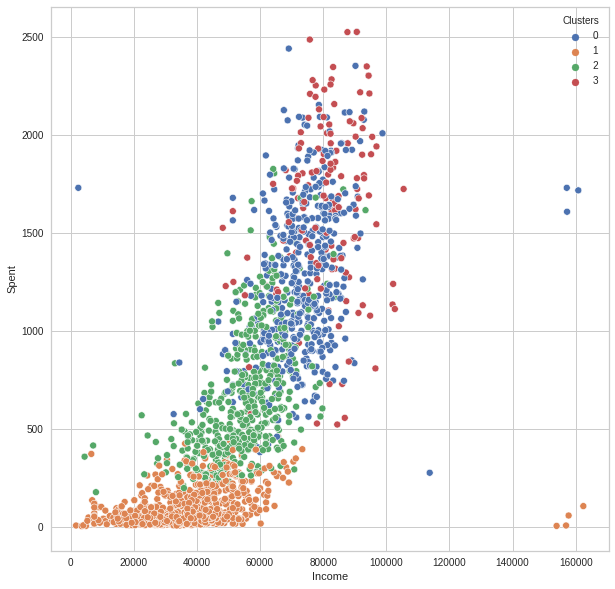

In [109]:
# Análise dos clusters relação ao salario(income)Xgasto(spent)
fig = plt.figure(figsize=(10,10))
p = sns.scatterplot(data=dataset,x = 'Income', y='Spent', hue=kmeans_pca.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1, 1), title='Clusters')
plt.show()

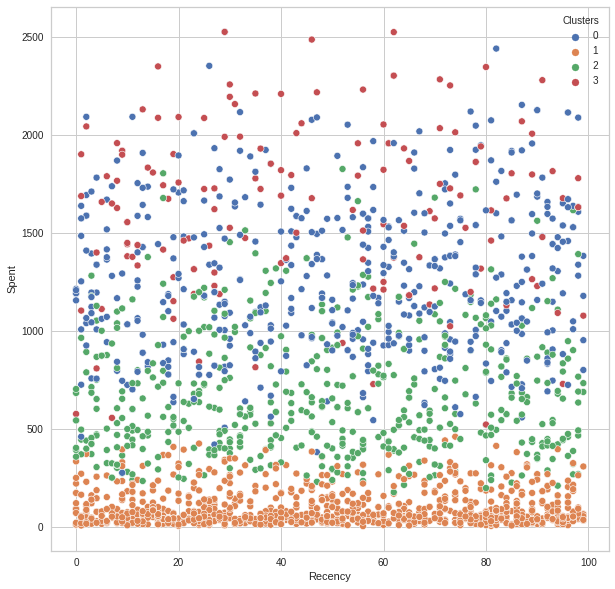

In [110]:
# Análise dos clusters relação ao gasto(spent)Xdias_sem_compras(recency)
fig = plt.figure(figsize=(10,10))
p = sns.scatterplot(data=dataset,x = 'Recency', y='Spent', hue=kmeans_pca.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1, 1), title='Clusters')
plt.show()

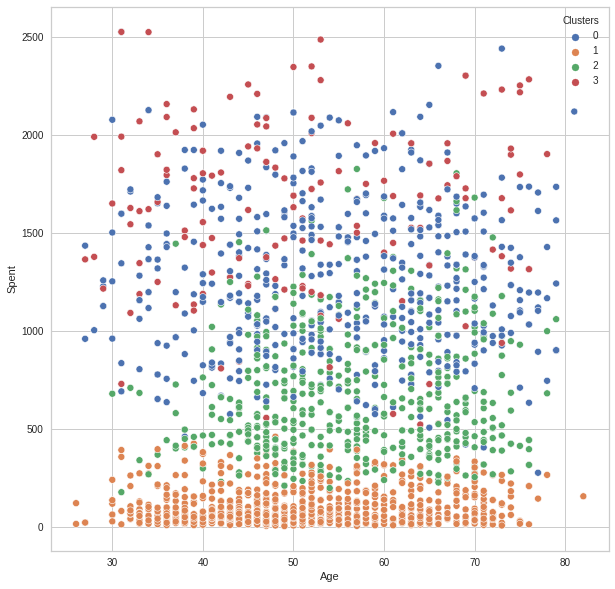

In [111]:
# Análise dos clusters relação ao gasto(spent)Xidade(age)
fig = plt.figure(figsize=(10,10))
p = sns.scatterplot(data=dataset,x = 'Age', y='Spent', hue=kmeans_pca.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1, 1), title='Clusters')
plt.show()

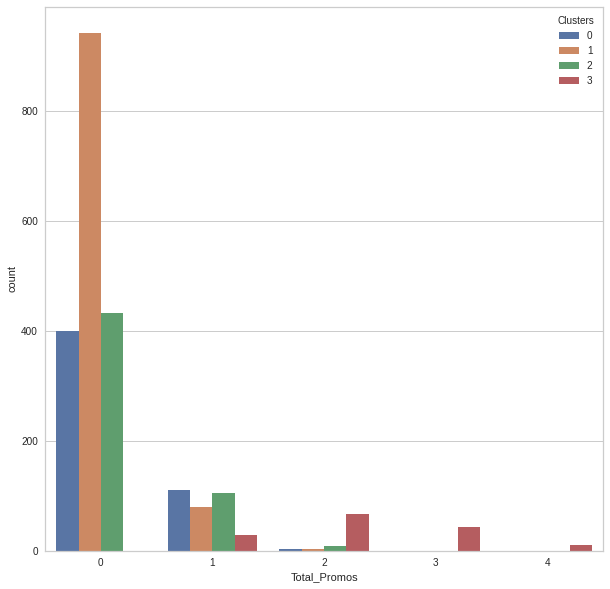

In [112]:
fig = plt.figure(figsize=(10,10))
p = sns.countplot(x=dataset['Total_Promos'], hue=kmeans_pca.labels_, palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1, 1), title='Clusters')
plt.show()

<Figure size 720x720 with 0 Axes>

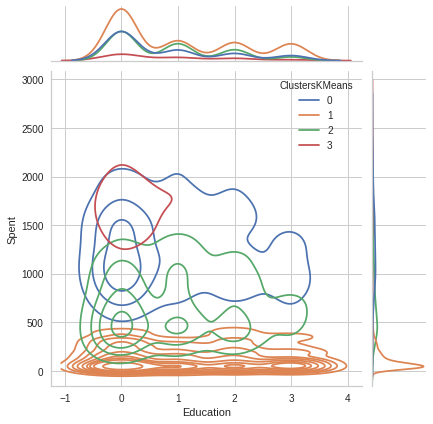

<Figure size 720x720 with 0 Axes>

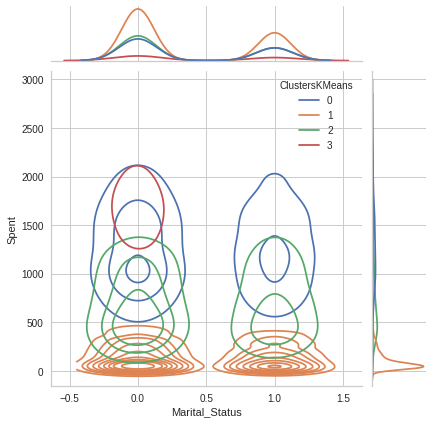

<Figure size 720x720 with 0 Axes>

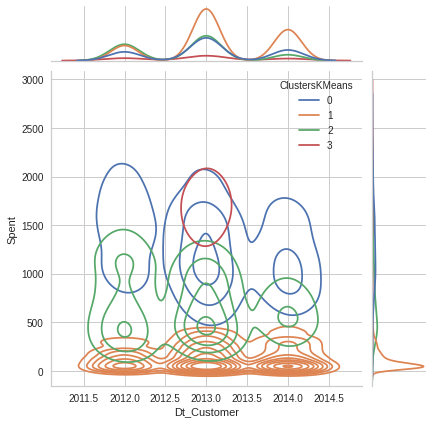

<Figure size 720x720 with 0 Axes>

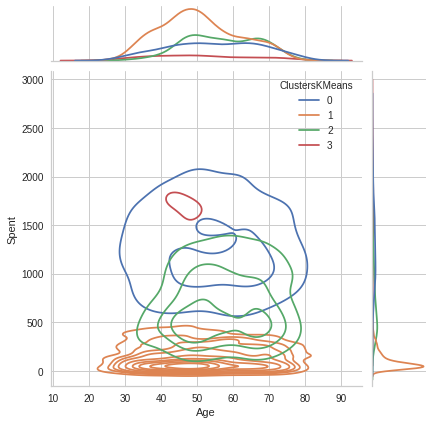

<Figure size 720x720 with 0 Axes>

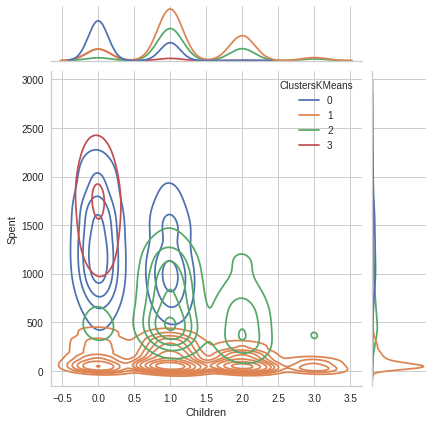

<Figure size 720x720 with 0 Axes>

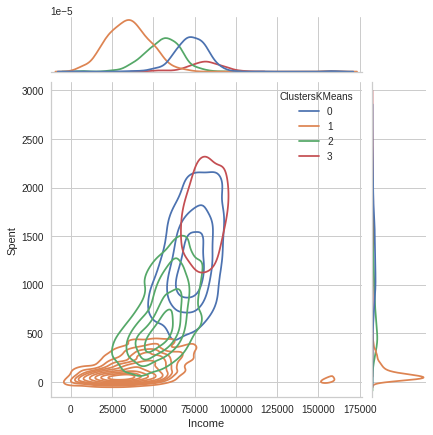

In [113]:
for i in Features:
    plt.figure(figsize=[10, 10])
    sns.jointplot(x=dataset[i], y=dataset["Spent"], hue=dataset["ClustersKMeans"], kind="kde", palette='deep')
    plt.show()

<Figure size 1440x1440 with 0 Axes>

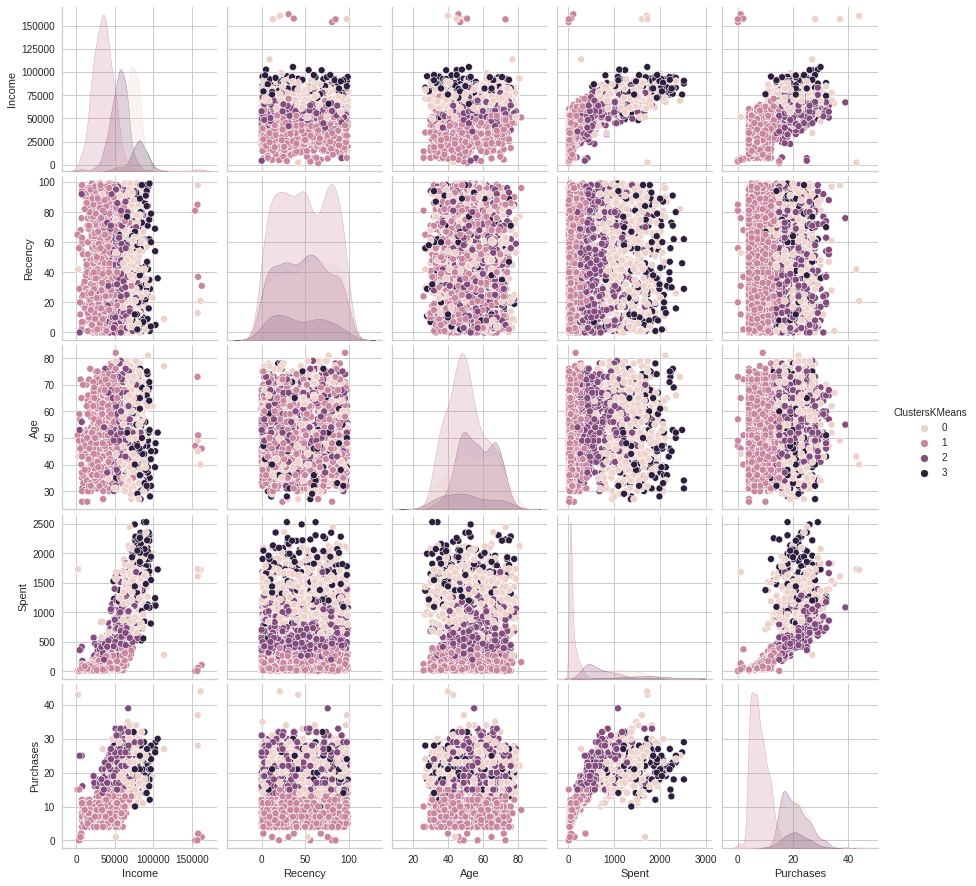

In [115]:
# Plotando os principais atributos do dataset em pares e relacionados aos clusters
plot = [ "Income", "Recency", "Age", "Spent", "Purchases", "ClustersKMeans"]
plt.figure(figsize=[20, 20])
plot = sns.pairplot(dataset[plot], hue= "ClustersKMeans")
#Taking hue 
_ = plt.show()